In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys

In [20]:
sys.path.append('..')

## Calculating Vaccine Coverage for Municipalities

In [21]:
def coverage_age(p,e):
    return (1 +((1-e)*((1/p) -1)))**-1

## Some municipalities with the most cases

In [22]:
first_10 = [355030., 130260., 150140.,130250., 351630.]
first_10_names = ['SP','Manaus','Belem','Manaus','Francisco Morato']

## Data on population pyramids

In [23]:
data_muns = pd.read_csv('../Data/age_groups_municipalities.csv')

### Total population for each of these municipalities

In [24]:
data_muns['Municipio'] = data_muns['Municipio'].astype(str).str[:6].astype(int)
data_total = data_muns[data_muns['Municipio'].isin(first_10)]
data_total = data_total[['Municipio','Total']]
data_total

,Municipio,Total
109,130250,99613
111,130260,2255903
169,150140,1506420
3453,351630,179372
3829,355030,12396372


### Example for SP

In [52]:
data_sp = data_muns[data_muns['Municipio'] == 355030]
print(data_sp)
data_sp = data_sp.to_numpy()[0]
data_sp = data_sp[2:8]
data_sp

      Unnamed: 0  Municipio  0 a 4 anos  5 a 9 anos  10 a 14 anos  \
3829        3829     355030      779817      787114        779315   

      15 a 19 anos  20 a 29 anos  30 a 39 anos  40 a 49 anos  50 a 59 anos  \
3829        841885       1832490       2015873       1845307       1463257   

      60 a 69 anos  70 a 79 anos  80 anos e mais     Total  
3829       1110842        618561          321911  12396372  


array([ 779817,  787114,  779315,  841885, 1832490, 2015873], dtype=int64)

## Calculating coverage and $S_0$ for each municipality

In [25]:
df_mun = pd.read_csv('../Data/analyzed/age_vaccine_municipalities.csv')
mun_path = '../Data/municipalities.csv'
mun_file = pd.read_csv(mun_path)
mun_file['codigo'] = mun_file['municipio'].astype(str).str[:6].astype(int)
mun_file = mun_file[['municipio','name','codigo']]
df_mun = df_mun.merge(mun_file, how = 'left', left_on = 'ID_MN_RESI', right_on = 'codigo')

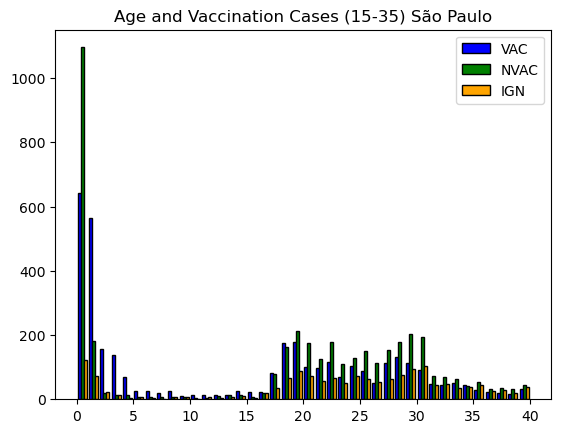

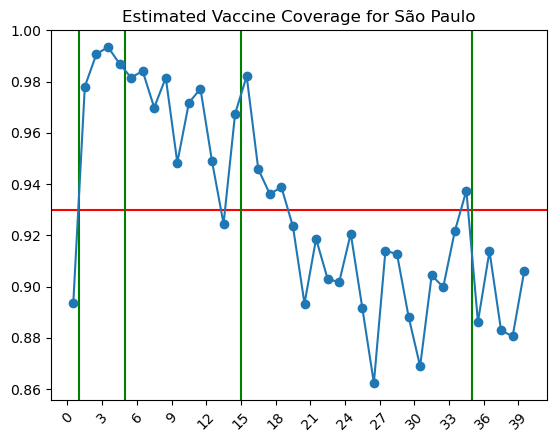

[ 779817  787114  779315  841885 1832490 2015873]
505521.37519208307


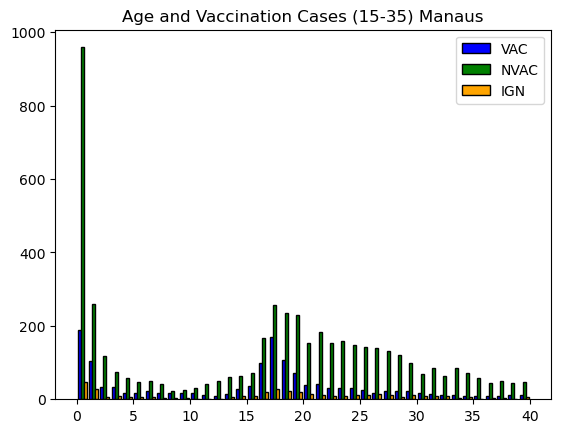

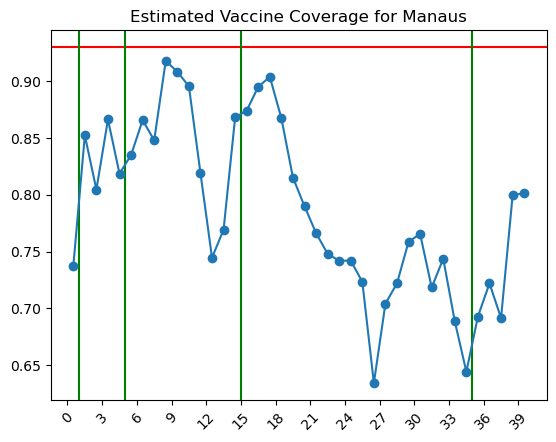

[173176 182624 195468 199775 413206 378413]
332921.6368917478


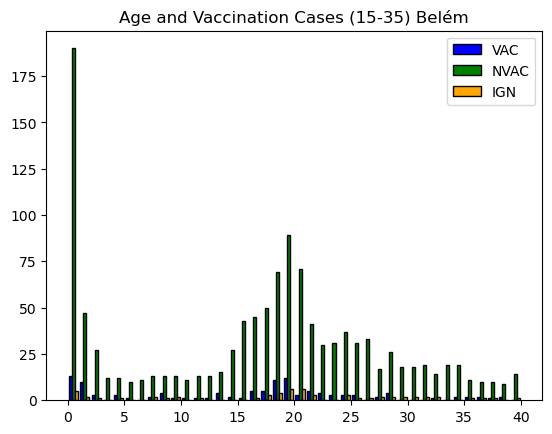

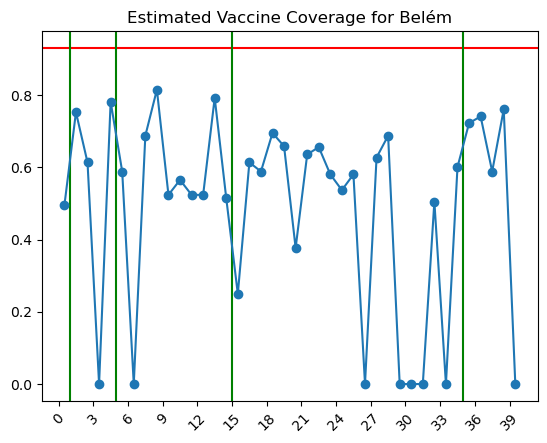

[ 82062  90331 111076 121161 238149 250445]
460870.19178153784


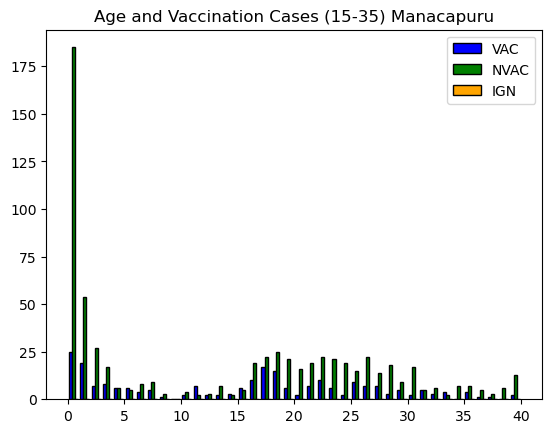

C:\Users\denise.cammarota\AppData\Local\Temp\ipykernel_25396\2943713260.py:24: RuntimeWarning: invalid value encountered in divide
  p_vacs = vacs/(vacs+nvacs)


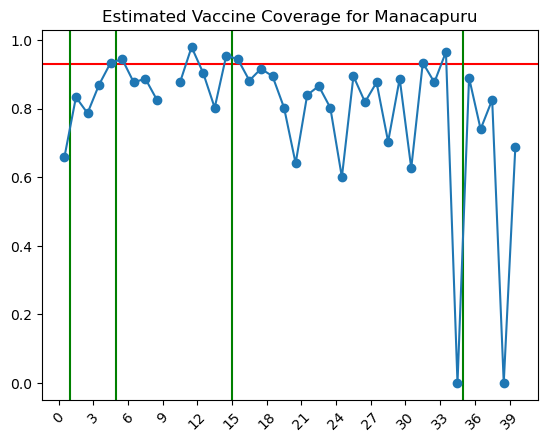

[10447 10671  9766  9021 18360 14907]
14217.705572901294


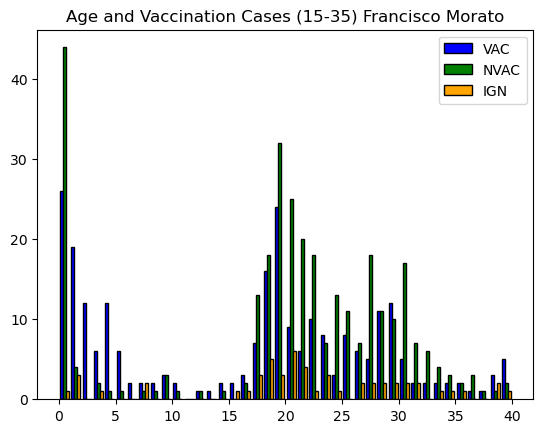

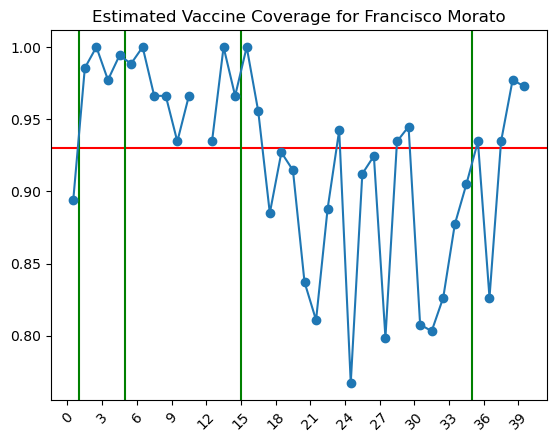

[15572 15136 13612 13603 30810 29637]
nan


In [59]:
for mun in first_10:
    df_tmp = df_mun[df_mun['ID_MN_RESI'] == mun]
    df_tmp = df_tmp[df_tmp['NU_IDADE_N'] <= 40]
    mun_name = df_tmp['name'].unique()[0]
    min_age = 0
    max_age = 40
    colors=['blue', 'green', 'orange']
    names=['VAC', 'NVAC', 'IGN']
    x_vac = list(df_tmp[df_tmp['CS_VACINA'] == 1]['NU_IDADE_N'])
    x_nvac = list(df_tmp[df_tmp['CS_VACINA'] == 2]['NU_IDADE_N'])
    x_ign = list(df_tmp[df_tmp['CS_VACINA'] == 9]['NU_IDADE_N'])
    bins = plt.hist([x_vac, x_nvac, x_ign], color=colors, label=names, bins=np.arange(0,max_age+1,1), edgecolor = 'black')
    plt.title('Age and Vaccination Cases (15-35) '+ str(mun_name))
    plt.legend()
    #plt.xlim((15,35))
    #plt.ylim((0,10))
    plt.show()
    vacs = bins[0][0]
    nvacs = bins[0][1]
    ign = bins[0][2]
    #vacs = vacs[1:]
    #nvacs = nvacs[1:]
    #ign = ign[1:]
    p_vacs = vacs/(vacs+nvacs)
    c_vacs = []
    for p in p_vacs:
        if(p == np.nan):
            c_vacs.append(np.nan)
        elif(p == 0):
            c_vacs.append(0)
        else:
            c_vacs.append(coverage_age(p,0.93))
    plt.xticks(np.arange(0,max_age+1,3), rotation = 45)
    plt.axhline(0.93,color = 'r')
    plt.axvline(1, color = 'g')
    plt.axvline(5, color = 'g')
    plt.axvline(15, color = 'g')
    plt.axvline(35, color = 'g')
    plt.title('Estimated Vaccine Coverage for '+ str(mun_name))
    plt.plot(bins[1][0:-1] + 0.5,c_vacs,'-o')
    plt.show()
    # population pyramid of this municipality
    data_sp = data_muns[data_muns['Municipio'] == mun]
    data_sp = data_sp.to_numpy()[0]
    data_sp = data_sp[2:8]
    vec_coverage = np.array([1-np.mean(c_vacs[0:4]),1-np.mean(c_vacs[4:9]),1-np.mean(c_vacs[10:15]),
                1-np.mean(c_vacs[15:20]),1-np.mean(c_vacs[20:30]), 1-np.mean(c_vacs[30:40])])
    vec_population = data_sp
    vec_nvac_population = vec_coverage*vec_population
    print(data_sp)
    total_nvac = np.sum(vec_coverage*vec_population)
    print(total_nvac)

### Extra Calculation for Francisco Morato

In [62]:
vec_coverage = np.array([0.03580971, 0.0169929, 0.040296175, 0.06359945, 0.12394487, 0.11348496])
vec_population = np.array([15572, 15136, 13612, 13603, 30810, 29637])
total_fm = np.sum(vec_coverage*vec_population)
print(total_fm)

9410.58339519


## Calculating coverage and $S_0$ for each municipality with ignored

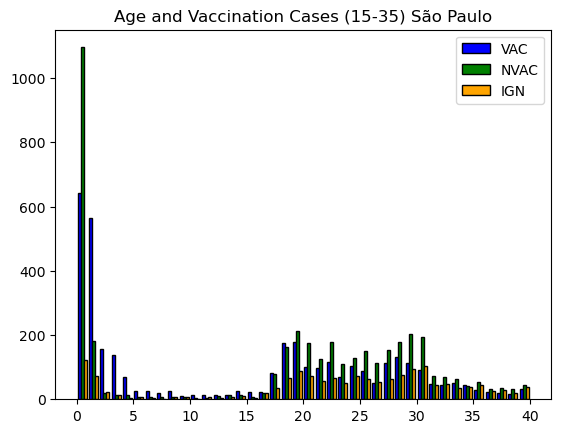

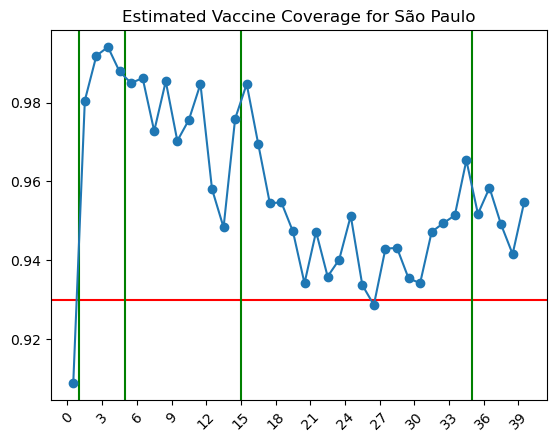

[0.03115934 0.01658095 0.03147344 0.03786218 0.06069038 0.04965673]
305069.1741277385


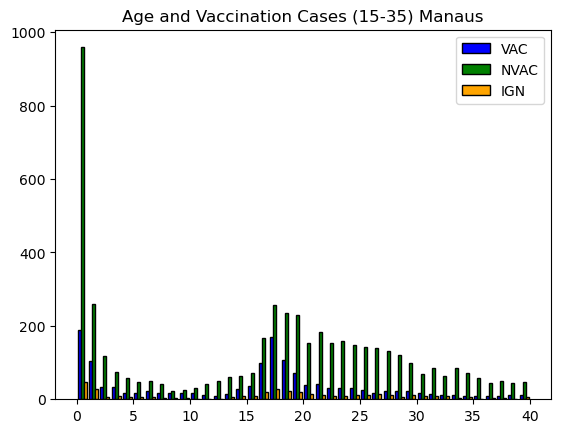

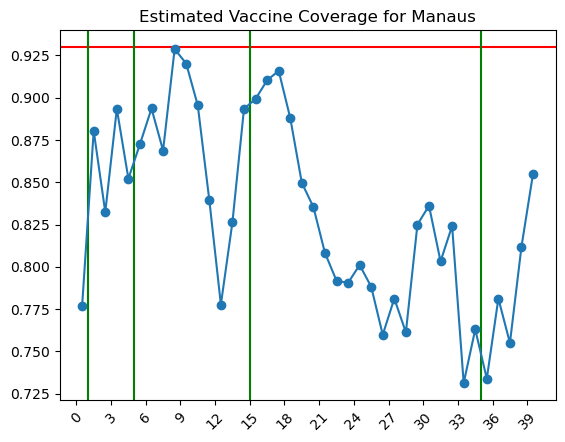

[0.15419679 0.11681615 0.15348519 0.10734941 0.20574474 0.21051082]
264158.7794207275


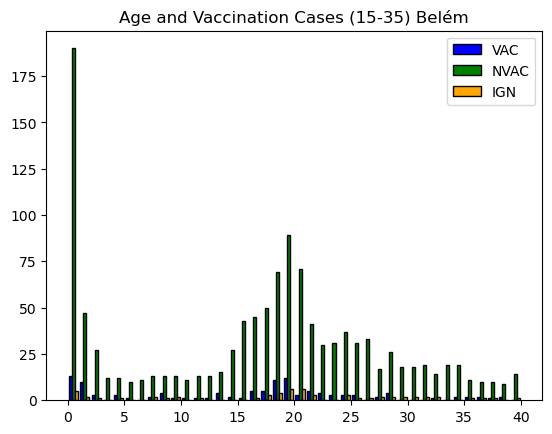

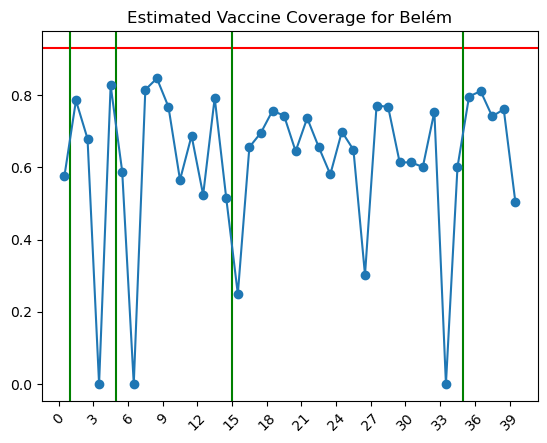

[0.49024407 0.38492616 0.38359296 0.37998464 0.35834104 0.38187187]
344624.9249704991


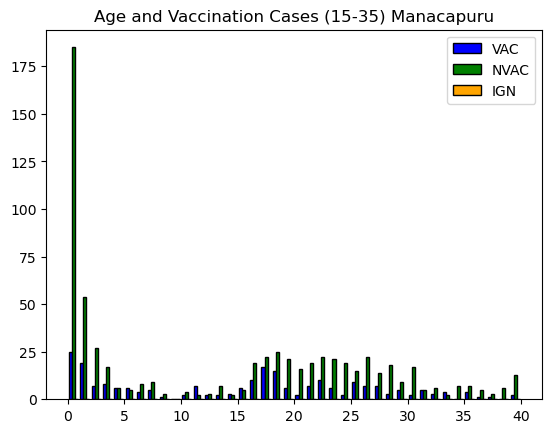

C:\Users\denise.cammarota\AppData\Local\Temp\ipykernel_25396\1952058236.py:25: RuntimeWarning: invalid value encountered in divide
  p_vacs = vacs/(vacs+nvacs)


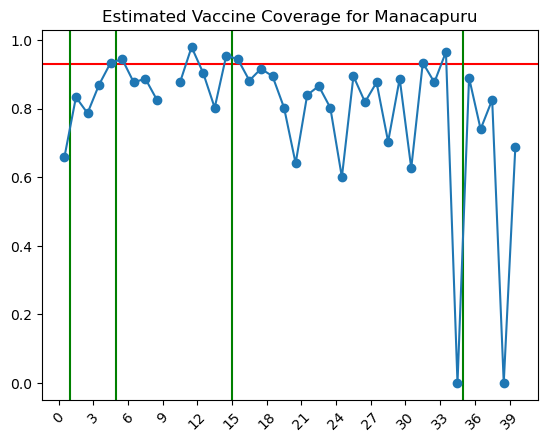

[0.21231513 0.10575999 0.09576212 0.1113668  0.20635613 0.34497439]
14217.705572901294


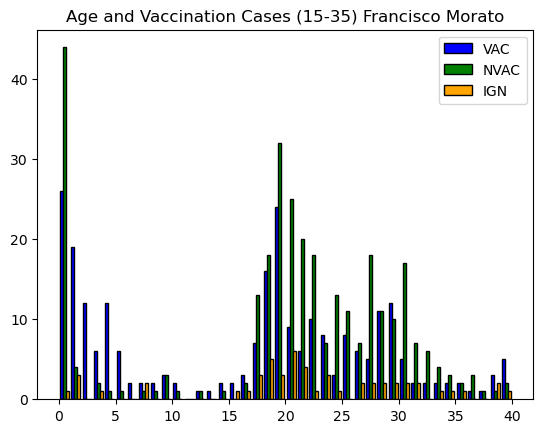

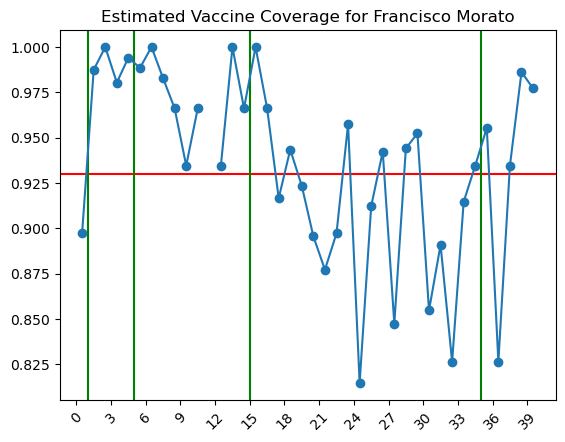

[0.0336422  0.01366941        nan 0.05008746 0.09596341 0.0898939 ]
nan


In [65]:
for mun in first_10:
    df_tmp = df_mun[df_mun['ID_MN_RESI'] == mun]
    df_tmp = df_tmp[df_tmp['NU_IDADE_N'] <= 40]
    mun_name = df_tmp['name'].unique()[0]
    min_age = 0
    max_age = 40
    colors=['blue', 'green', 'orange']
    names=['VAC', 'NVAC', 'IGN']
    x_vac = list(df_tmp[df_tmp['CS_VACINA'] == 1]['NU_IDADE_N'])
    x_nvac = list(df_tmp[df_tmp['CS_VACINA'] == 2]['NU_IDADE_N'])
    x_ign = list(df_tmp[df_tmp['CS_VACINA'] == 9]['NU_IDADE_N'])
    bins = plt.hist([x_vac, x_nvac, x_ign], color=colors, label=names, bins=np.arange(0,max_age+1,1), edgecolor = 'black')
    plt.title('Age and Vaccination Cases (15-35) '+ str(mun_name))
    plt.legend()
    #plt.xlim((15,35))
    #plt.ylim((0,10))
    plt.show()
    vacs = bins[0][0]
    nvacs = bins[0][1]
    ign = bins[0][2]
    #vacs = vacs[1:]
    #nvacs = nvacs[1:]
    #ign = ign[1:]
    vacs = vacs + ign
    p_vacs = vacs/(vacs+nvacs)
    c_vacs = []
    for p in p_vacs:
        if(p == np.nan):
            c_vacs.append(np.nan)
        elif(p == 0):
            c_vacs.append(0)
        else:
            c_vacs.append(coverage_age(p,0.93))
    plt.xticks(np.arange(0,max_age+1,3), rotation = 45)
    plt.axhline(0.93,color = 'r')
    plt.axvline(1, color = 'g')
    plt.axvline(5, color = 'g')
    plt.axvline(15, color = 'g')
    plt.axvline(35, color = 'g')
    plt.title('Estimated Vaccine Coverage for '+ str(mun_name))
    plt.plot(bins[1][0:-1] + 0.5,c_vacs,'-o')
    plt.show()
    # population pyramid of this municipality
    data_sp = data_muns[data_muns['Municipio'] == mun]
    data_sp = data_sp.to_numpy()[0]
    data_sp = data_sp[2:8]
    vec_coverage = np.array([1-np.mean(c_vacs[0:4]),1-np.mean(c_vacs[4:9]),1-np.mean(c_vacs[10:15]),
                1-np.mean(c_vacs[15:20]),1-np.mean(c_vacs[20:30]), 1-np.mean(c_vacs[30:40])])
    vec_population = data_sp
    vec_nvac_population = vec_coverage*vec_population
    print(vec_coverage)
    total_nvac = np.sum(vec_coverage*vec_population)
    print(total_nvac)

### Extra Calculation for Francisco Morato

In [67]:
vec_coverage = np.array([0.0336422,  0.01366941,  0.031878435, 0.05008746, 0.09596341, 0.0898939 ])
vec_population = np.array([15572, 15136, 13612, 13603, 30810, 29637])
total_fm = np.sum(vec_coverage*vec_population)
print(total_fm)

7466.863680159999
